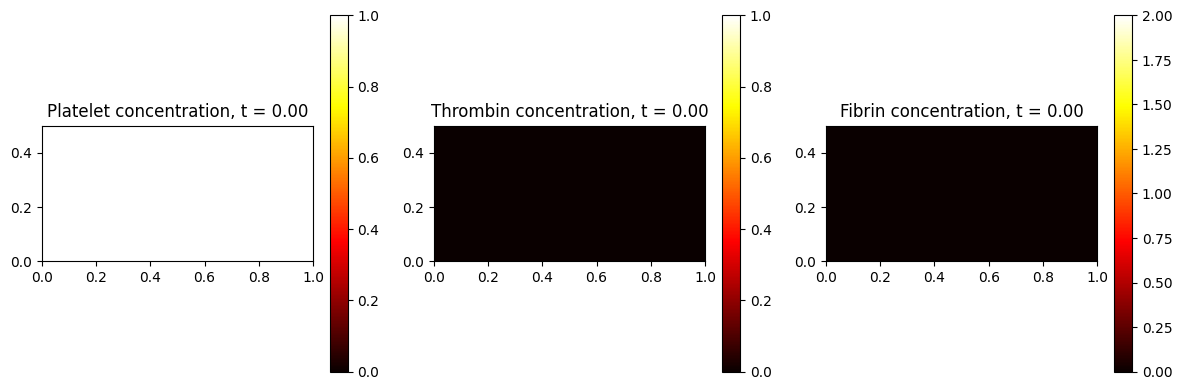

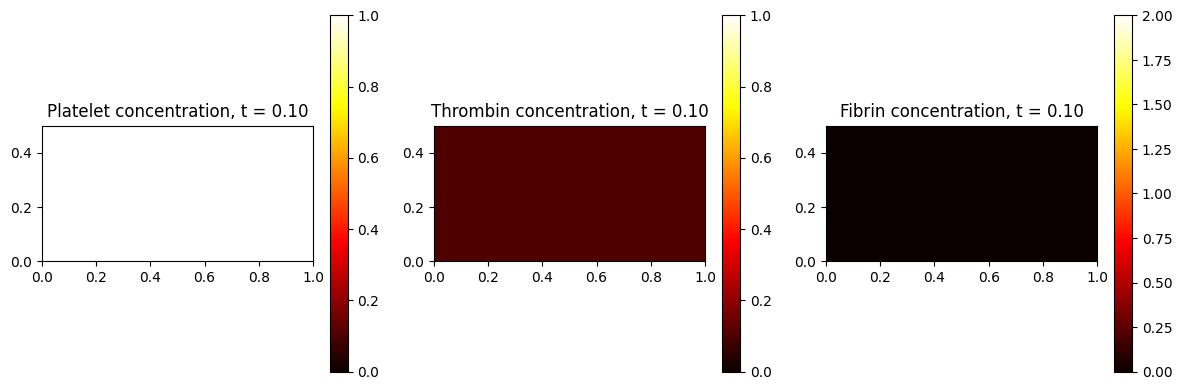

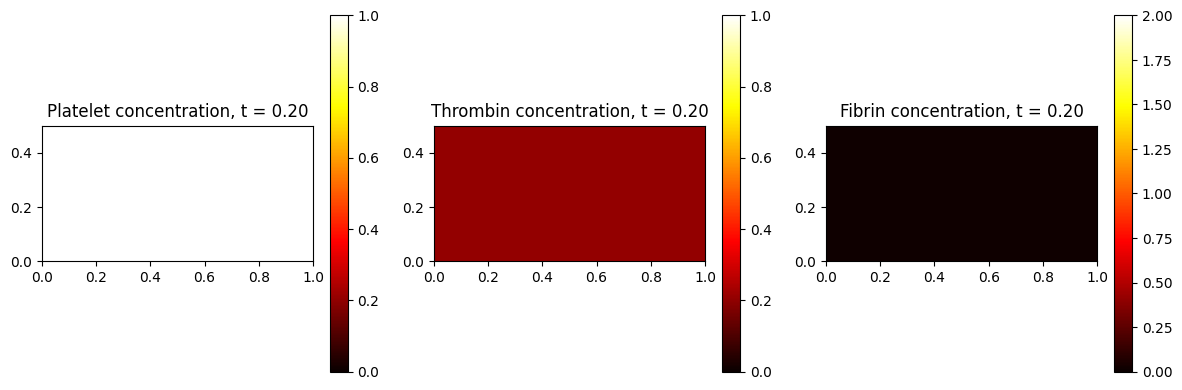

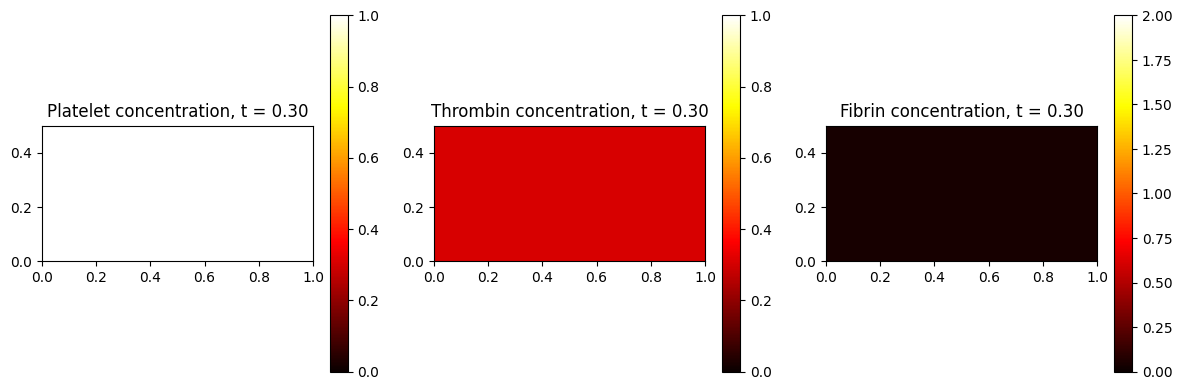

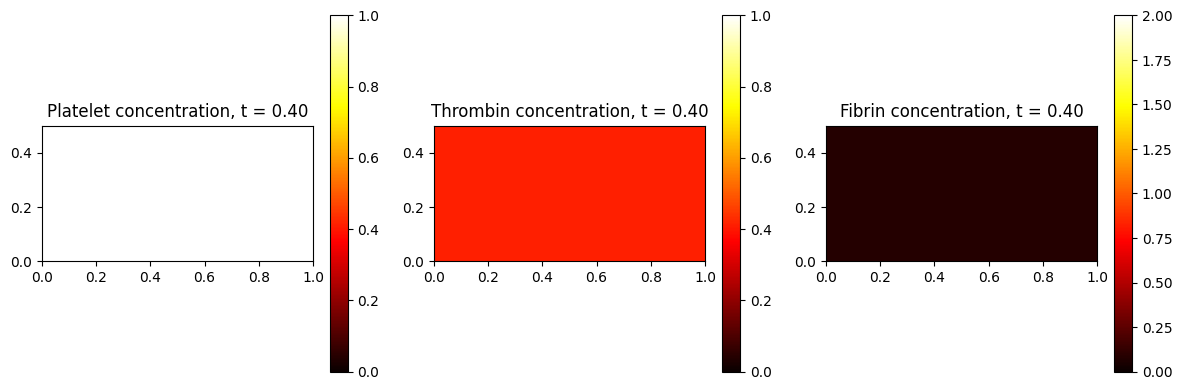

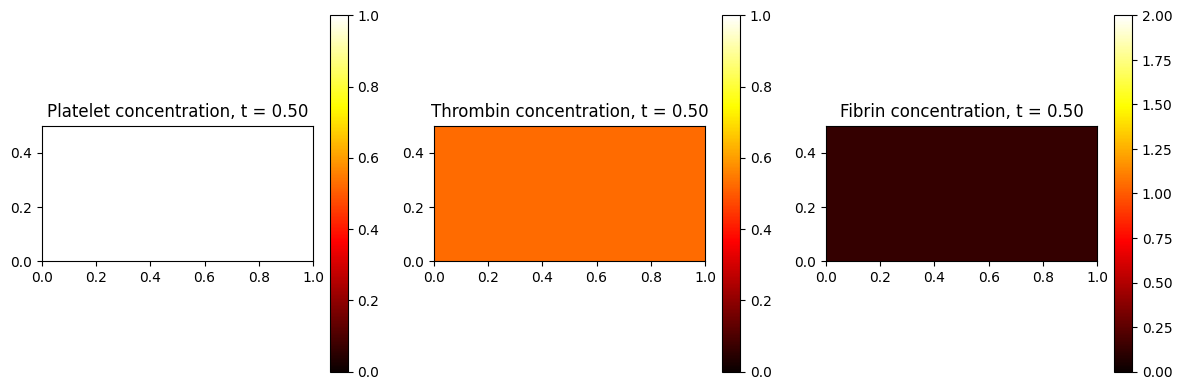

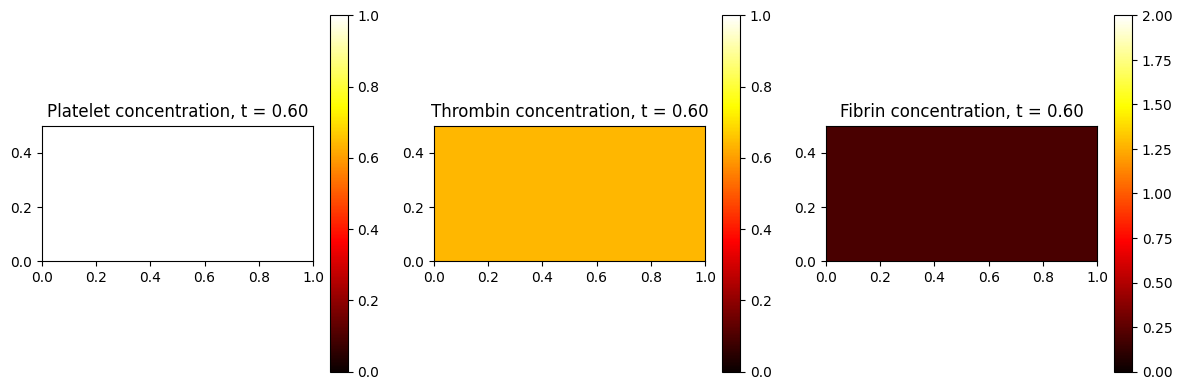

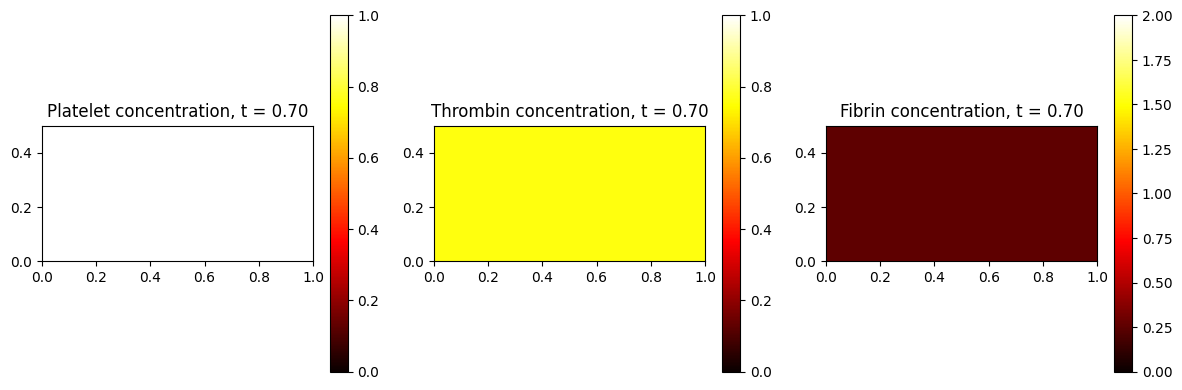

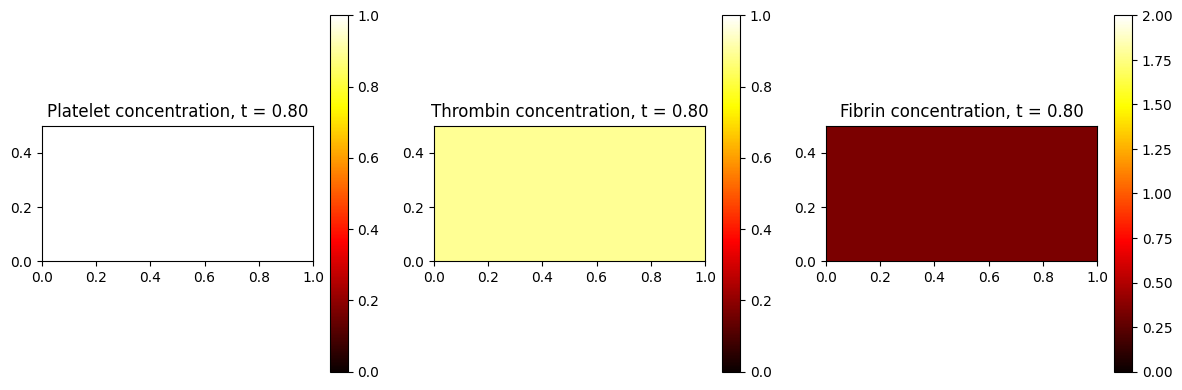

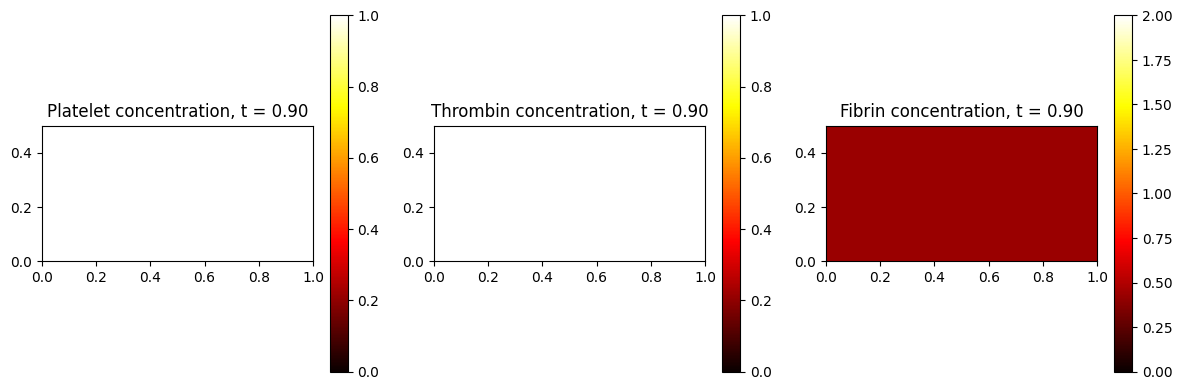

The maximum number of iterations has been reached. Stopping work.


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
Lx, Ly = 1.0, 0.5  # Area dimensions
Nx, Ny = 100, 50   # Number of grid points
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)
dt = 0.001         # Time step
T = 1.0            # Total simulation time
nu = 0.01          # Kinematic viscosity
rho = 1.0          # Blood Density
Dp = 0.01          # Platelet diffusion coefficient
Dtheta = 0.01      # Thrombin diffusion coefficient
kp = 1.0           # Platelet activation rate constant
ktheta = 1.0       # Thrombin formation rate constant
kappa = 1.0        # Fibrin formation rate constant


u = np.zeros((Nx, Ny))  # Speed ​​x
v = np.zeros((Nx, Ny))  # Speed y
p = np.zeros((Nx, Ny))  # Pressure
Cp = np.ones((Nx, Ny))  # Platelet concentration, initial 1.0
theta = np.zeros((Nx, Ny)) # Thrombin concentration
psi = np.zeros((Nx, Ny))   # Fibrin concentration

# Initial conditions
u[:, :] = 1.0   # Initial blood velocity

# Function for solving the Navier-Stokes equation
def solve_navier_stokes(u, v, p, dt, dx, dy, nu, rho):
    un = u.copy()
    vn = v.copy()
    pn = p.copy()

    # Equation for u
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * (un[1:-1, 1:-1] * (un[1:-1, 1:-1] - un[1:-1, :-2])) -
                     dt / dy * (vn[1:-1, 1:-1] * (un[1:-1, 1:-1] - un[:-2, 1:-1])) +
                     nu * (dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, :-2]) +
                           dt / dy**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[:-2, 1:-1])) -
                     dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, :-2]))

    # Equation for v
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     dt / dx * (un[1:-1, 1:-1] * (vn[1:-1, 1:-1] - vn[1:-1, :-2])) -
                     dt / dy * (vn[1:-1, 1:-1] * (vn[1:-1, 1:-1] - vn[:-2, 1:-1])) +
                     nu * (dt / dx**2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, :-2]) +
                           dt / dy**2 * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[:-2, 1:-1])) -
                     dt / (2 * rho * dy) * (p[2:, 1:-1] - p[:-2, 1:-1]))

    # Incompressibility condition
    p[1:-1, 1:-1] = (pn[1:-1, 1:-1] -
                     rho * dx**2 / (2 * (dx**2 + dy**2)) *
                     ((u[1:-1, 2:] - u[1:-1, :-2]) / dx +
                      (v[2:, 1:-1] - v[:-2, 1:-1]) / dy))

    # Boundary conditions for pressure
    p[:, -1] = p[:, -2]  # dp/dy = 0 at the upper limit
    p[0, :] = p[1, :]    # dp/dx = 0 on the left border
    p[-1, :] = p[-2, :]  # dp/dx = 0 on the right border
    p[:, 0] = 0          # p = 0 at the lower limit

    return u, v, p

def solve_reaction_diffusion(C, u, v, dt, dx, dy, D, R):
    Cn = C.copy()

    # Reaction-diffusion equation
    C[1:-1, 1:-1] = (Cn[1:-1, 1:-1] +
                     dt * D * ((Cn[1:-1, 2:] - 2 * Cn[1:-1, 1:-1] + Cn[1:-1, :-2]) / dx**2 +
                                (Cn[2:, 1:-1] - 2 * Cn[1:-1, 1:-1] + Cn[:-2, 1:-1]) / dy**2) -
                     dt * (u[1:-1, 1:-1] * (Cn[1:-1, 1:-1] - Cn[1:-1, :-2]) / dx +
                           v[1:-1, 1:-1] * (Cn[1:-1, 1:-1] - Cn[:-2, 1:-1]) / dy) +
                     dt * R[1:-1, 1:-1])

    # Boundary conditions
    C[:, 0] = C[:, 1]    # Zero flow at the lower boundary
    C[:, -1] = C[:, -2]  # Zero flux at the upper limit
    C[0, :] = C[1, :]    # Zero flow on the left border
    C[-1, :] = C[-2, :]  # Zero flux on the right border

    return C


for t in np.arange(0, T, dt):
    # Solving the Navier-Stokes equations
    u, v, p = solve_navier_stokes(u, v, p, dt, dx, dy, nu, rho)

    # Solving the equation for platelet concentration
    Cp = solve_reaction_diffusion(Cp, u, v, dt, dx, dy, Dp, kp * theta)

    # Solving the equation for thrombin concentration
    theta = solve_reaction_diffusion(theta, u, v, dt, dx, dy, Dtheta, ktheta * Cp)

    # Solving the equation for fibrin concentration
    psi += dt * kappa * theta


    Cp_vmin, Cp_vmax = 0.0, 1.0         # For platelet concentration
    theta_vmin, theta_vmax = 0.0, 1.0   # For thrombin concentration
    psi_vmin, psi_vmax = 0.0, 2.0       # For fibrin concentration

    equilibrium_threshold = 1e-5
    max_iterations = 900


    for t in np.arange(0, T, dt):
    # Solving the Navier-Stokes equations
      u, v, p = solve_navier_stokes(u, v, p, dt, dx, dy, nu, rho)


      old_Cp = Cp.copy()
      old_theta = theta.copy()
      old_psi = psi.copy()

    # Solving the equation for platelet concentration
      Cp = solve_reaction_diffusion(Cp, u, v, dt, dx, dy, Dp, kp * theta)

    # Solving the equation for thrombin concentration
      theta = solve_reaction_diffusion(theta, u, v, dt, dx, dy, Dtheta, ktheta * Cp)

    # Solving the equation for fibrin concentration
      psi += dt * kappa * theta


      if (np.max(np.abs(Cp - old_Cp)) < equilibrium_threshold and
        np.max(np.abs(theta - old_theta)) < equilibrium_threshold and
        np.max(np.abs(psi - old_psi)) < equilibrium_threshold):
        print(f'Equilibrium reached at t = {t:.2f}')
        break


      if t % 0.1 < dt:
        plt.figure(figsize=(12, 4))

        plt.subplot(131)
        plt.imshow(Cp.T, cmap='hot', origin='lower', extent=[0, Lx, 0, Ly], vmin=Cp_vmin, vmax=Cp_vmax)
        plt.title(f'Platelet concentration, t = {t:.2f}')
        plt.colorbar()

        plt.subplot(132)
        plt.imshow(theta.T, cmap='hot', origin='lower', extent=[0, Lx, 0, Ly], vmin=theta_vmin, vmax=theta_vmax)
        plt.title(f'Thrombin concentration, t = {t:.2f}')
        plt.colorbar()

        plt.subplot(133)
        plt.imshow(psi.T, cmap='hot', origin='lower', extent=[0, Lx, 0, Ly], vmin=psi_vmin, vmax=psi_vmax)
        plt.title(f'Fibrin concentration, t = {t:.2f}')
        plt.colorbar()

        plt.tight_layout()
        plt.show()

    # Checking for maximum number of iterations
    if t >= max_iterations * dt:
        print('The maximum number of iterations has been reached. Stopping work.')
        break